# Data Analysis (part 2)
## Summer classes analysis

In [1]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly_express as px
import math
import plotly

In [2]:
# load the cleaned data back in 
comm_revs_df2 = pd.read_csv('../data/clean_data/comm_revs_df2')

It is possible that summer courses in COMM are different in many respects than classes offered in the spring or fall. To look at these we'll extract the summer courses first:

In [3]:
# list the summer courses
comm_summer = comm_revs_df2[comm_revs_df2['Semester'].str.contains("B")]
comm_summer

,CourseCode,level,Section,CourseTitle,Semester,instructor_first,instructor_last,CourseQuality,InstructorQuality,Difficulty,...,StimulateInterest,InstructorAccess,CommAbility,ReadingsValue,TAQuality,RecommendMajor,RecommendNonMajor,num_reviewers,num_students,hundred
33,COMM-125-910,125,910,COMMUNICATION BEHAVIOR,2003B,CARLIN,BARMADA,2.57,2.57,2.43,...,2.36,3.14,2.50,2.79,NaN,3.46,1.86,14,14,1
34,COMM-225-910,225,910,CHILDREN & MEDIA,2003B,LELA,JACOBSOHN,3.82,3.82,2.36,...,3.73,3.73,3.64,3.45,NaN,3.82,3.18,11,14,2
132,COMM-123-900,123,900,COMM & POPULAR CULTURE,2006B,JOSH,LAUER,3.15,3.54,2.23,...,3.00,3.85,3.38,2.85,NaN,3.15,2.54,13,17,1
133,COMM-125-920,125,920,COMMUNICATION BEHAVIOR,2006B,ARIEL R.,CHERNIN,2.64,3.09,2.50,...,2.59,3.50,3.23,2.18,NaN,3.23,2.14,22,23,1
134,COMM-130-920,130,920,MASS MEDIA & SOC,2006B,NADINE G.,GABBADON,2.70,2.64,2.95,...,2.43,2.96,2.26,2.50,NaN,2.43,2.64,23,26,1
135,COMM-262-910,262,910,VISUAL COMMUNICATION,2006B,JASON S.,TOCCI,3.18,3.45,2.29,...,3.50,3.32,3.32,2.33,NaN,3.55,3.30,22,26,2
136,COMM-339-910,339,910,CRIT PERSPECT IN JOURNAL,2006B,MATTHEW A.,CARLSON,3.08,3.42,2.00,...,3.00,3.58,3.58,3.00,NaN,3.58,2.00,12,15,3
153,COMM-123-900,123,900,COMM & POPULAR CULTURE,2005B,BETHANY,KLEIN,3.19,3.25,2.50,...,3.19,3.56,3.13,2.88,NaN,3.38,3.00,16,23,1
154,COMM-125-920,125,920,COMMUNICATION BEHAVIOR,2005B,NATALIE J.,JOMINI,3.00,3.40,2.50,...,3.30,3.50,3.60,3.00,NaN,3.10,2.60,10,11,1
155,COMM-125-920,125,920,COMMUNICATION BEHAVIOR,2005B,JI HOON,PARK,2.91,3.18,2.45,...,3.18,3.27,3.18,2.36,NaN,3.27,2.45,11,11,1


In [4]:
comm_summer.shape

(71, 22)

#### There are 71 summer COMM classes in this dataset. How big are these classes?

In [5]:
comm_summer['num_students'].describe()

count    71.000000
mean     13.056338
std       5.739306
min       3.000000
25%       9.000000
50%      13.000000
75%      16.000000
max      26.000000
Name: num_students, dtype: float64

The largest summer class had 26 students, the smallest had 3. The mean is 13. 

#### What are the best and worst summer COMM courses?

In [6]:
comm_summer[comm_summer['CourseQuality']==
            comm_summer['CourseQuality'].max()]

,CourseCode,level,Section,CourseTitle,Semester,instructor_first,instructor_last,CourseQuality,InstructorQuality,Difficulty,...,StimulateInterest,InstructorAccess,CommAbility,ReadingsValue,TAQuality,RecommendMajor,RecommendNonMajor,num_reviewers,num_students,hundred
328,COMM-275-900,275,900,Communication and Persuasion,2010B,CABRAL,BIGMAN-GALIMORE,4.0,3.67,3.33,...,3.67,4.0,4.0,4.0,NaN,3.67,3.0,3,4,2
757,COMM-290-910,290,910,Visual Culture and Communication,2019B,JASMINE ERIN NORKUNAS,ERDENER,4.0,4.00,2.00,...,4.00,4.0,4.0,NaN,NaN,NaN,NaN,3,5,2
758,COMM-290-910,290,910,Visual Culture and Communication,2019B,HANNA E,MORRIS,4.0,4.00,2.00,...,4.00,4.0,4.0,NaN,NaN,NaN,NaN,3,5,2


Visual Culture and Communication, and Communication and Persuasion, were the highest rated courses here. 
It's also clear based on level and section that Visual Culture and Communication in summer 2019 had two professors, but was only one section.

In [7]:
comm_summer[comm_summer['CourseQuality']==
            comm_summer['CourseQuality'].min()]

,CourseCode,level,Section,CourseTitle,Semester,instructor_first,instructor_last,CourseQuality,InstructorQuality,Difficulty,...,StimulateInterest,InstructorAccess,CommAbility,ReadingsValue,TAQuality,RecommendMajor,RecommendNonMajor,num_reviewers,num_students,hundred
250,COMM-299-910,299,910,Communications Internship,2009B,RONA J.,BUCHALTER,1.75,2.13,2.13,...,1.25,2.25,1.63,1.5,NaN,3.5,1.25,8,15,2


The lowest rated course quality was Communications Internship in summer 2009. 

#### What are the mean course ratings for summer COMM classes?

In [8]:
comm_summer_mean = comm_summer.mean()
comm_summer_mean

level                225.943662
Section              912.901408
CourseQuality          3.122394
InstructorQuality      3.358592
Difficulty             2.266197
AmountLearned          3.043509
WorkRequired           2.472676
StimulateInterest      3.197042
InstructorAccess       3.519577
CommAbility            3.352113
ReadingsValue          2.735965
TAQuality              3.500000
RecommendMajor         3.396667
RecommendNonMajor      2.614737
num_reviewers         10.000000
num_students          13.056338
hundred                1.845070
dtype: float64

#### How do these summer courses compare to non summer courses?

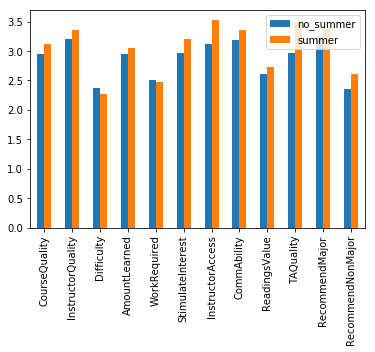

In [9]:
comm_nosummer = comm_revs_df2[comm_revs_df2['Semester'].str.contains("A|C")]
comm_nosummer_mean = comm_nosummer.mean()

#combine the two into one dataframe
comm_concat_mean = pd.concat([comm_nosummer_mean, comm_summer_mean], axis=1)
comm_concat_mean.columns = ['no_summer', 'summer']

#drop columns that will mess up the plot
comm_concat_mean = comm_concat_mean.drop(['num_reviewers',
                                          'num_students','Section','level','hundred'])
plot1 = comm_concat_mean.plot(kind='bar')

In [10]:
fig = plot1.get_figure()
fig.savefig('../data_analysis/visualizations/summer_no_summer_means.png',bbox_inches="tight")

#### There seems to be a small but consistent-across-variables trend that summer courses get 'better' reviews.

#### What if we were to examine the classes that are offered in both summer and non-summer versions?

In [11]:
#what are the classes that have been offered in both forms?
comm_both = pd.merge(comm_summer, comm_nosummer, on='level')
unique_levels = sorted(comm_both['level'].unique())
unique_levels

[123,
 125,
 130,
 140,
 225,
 226,
 237,
 262,
 270,
 275,
 290,
 299,
 300,
 305,
 339,
 340,
 398,
 410,
 430,
 491]

In [12]:
#for each of these, how do the ratings compare between summer and non-summer?

#creating arrays to store the values
l1 = []
l2 = []
l3 = unique_levels

for course in unique_levels:
    c1=(comm_nosummer[comm_nosummer['level']==course]['CourseQuality']).mean()
    l1.append(c1)
    c2 = (comm_summer[comm_summer['level']==course]['CourseQuality']).mean()
    l2.append(c2)

summer_comparison = pd.DataFrame()
summer_comparison['Spring_Fall'] = l1
summer_comparison['Summer'] = l2
summer_comparison['Class'] = l3

In [13]:
summer_comparison = summer_comparison[['Class','Spring_Fall','Summer']]
summer_comparison

,Class,Spring_Fall,Summer
0,123,2.794500,3.063333
1,125,2.478095,3.003636
2,130,2.295000,3.138182
3,140,3.153333,3.595000
4,225,3.241600,3.523333
5,226,3.471667,3.500000
6,237,2.978333,3.392500
7,262,3.383000,3.428000
8,270,2.210000,3.630000
9,275,2.555000,3.320000


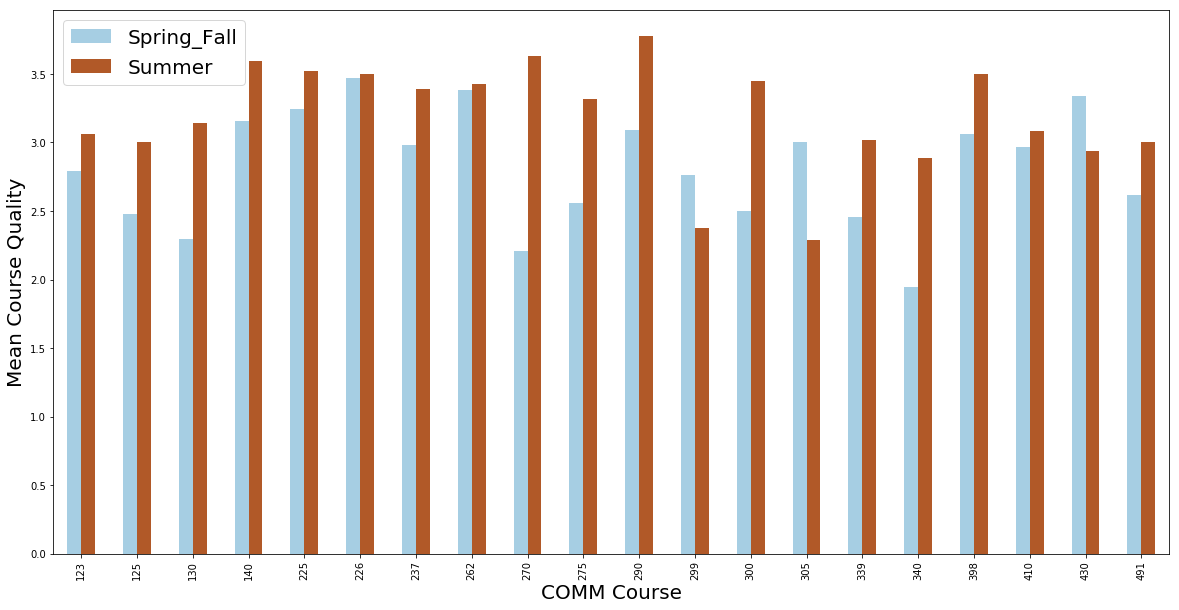

In [14]:
# visualization of above 
plot2 = summer_comparison.plot('Class',kind='bar', figsize=(20,10), colormap="Paired")
plot2.set_ylabel("Mean Course Quality", fontsize=20)
plot2.set_xlabel("COMM Course", fontsize=20)
plot2.legend(loc=2, prop={'size': 20})

In [15]:
fig2 = plot2.get_figure()
fig2.savefig('../data_analysis/visualizations/summer_no_summer_coursequalities.png')

#### We can see that, oftentimes, a class will receive higher ratings in its summer iteration.